# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rakha Darmawan Subarkah
- **Email:** rasubarkah@student.ub.ac.id
- **ID Dicoding:** rakhads

## Menentukan Pertanyaan Bisnis

- Is there a correlation between the weather situation and bike rental demand?
- At what day of the week does the rental hit it's peak number of customers?

## Import Semua Packages/Library yang Digunakan

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [22]:
dtLink = lambda x : f"https://raw.githubusercontent.com/Rakha-DS/Proyek-Analisis-Data/main/Data/{x}.csv"

day_df = pd.read_csv(dtLink("day"))
hour_df = pd.read_csv(dtLink("hour"))

### Assessing Data

In [23]:
day_df.info()
hour_df.info()
#Data lengkap tanpa ada missing values tapi tipe data dteday menggunakan object bukan datetime
print("Jumlah duplikasii data pada day.csv : ", day_df.duplicated().sum())
print("Jumlah duplikasii data pada hour.csv : ", hour_df.duplicated().sum())
#Data tidak derdapat duplikat value
print(day_df.describe())
print(hour_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

In [24]:
#Mengubah tipe data yang digunakan dteday menjadi datetime
dteday_columns = ["dteday"]
for column in dteday_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

## Exploratory Data Analysis (EDA)

### Explore ...

In [25]:
#Menambahkan label untuk data weathersit dan weekday
weatherSitch = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light snow/rain',
    4: 'Heavy rain/storm'
}
day_df['weatherSitch'] = day_df['weathersit'].map(weatherSitch)
numToDay = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

## Visualization & Explanatory Analysis

### Pertanyaan 1:

The correlation value between the weather and bike rental count is -0.297: 


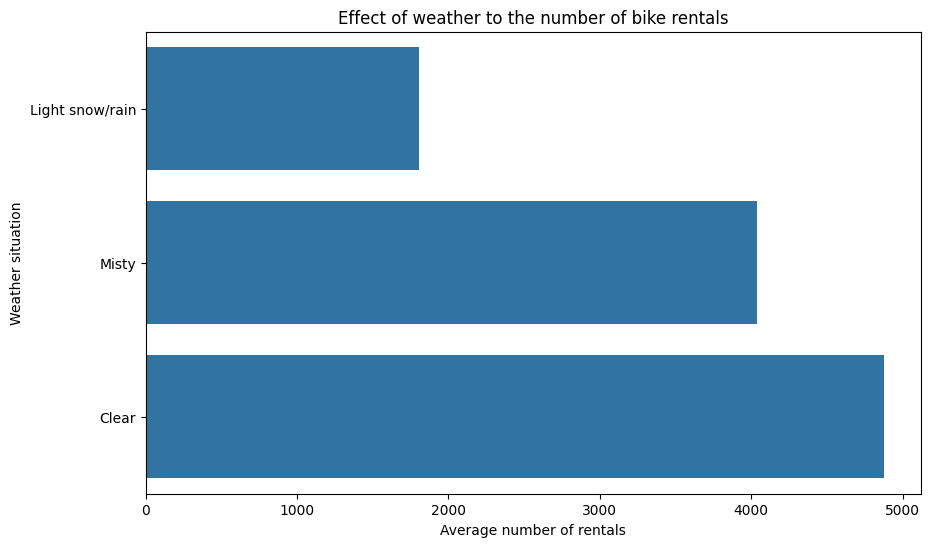

In [26]:
#Pertanyaan 1
weatherRental = day_df.groupby('weatherSitch')['cnt'].mean().reset_index().sort_values("cnt")
weatherCorr = day_df['weathersit'].corr(day_df['cnt'])
print("The correlation value between the weather and bike rental count is {:.3f}: ".format(weatherCorr))
plt.figure(figsize=(10,6))
sns.barplot(x='cnt', y='weatherSitch', data=weatherRental)
plt.xlabel('Average number of rentals')
plt.ylabel('Weather situation')
plt.title('Effect of weather to the number of bike rentals')
plt.show()

Karena nilai korelasi antara weathersit dan cnt menghasilkan nilai negatif sehingga dapat dilihat pada graph bahwa semakin parah cuaca semakin sedikit jumlah rental sepeda

### Pertanyaan 2:

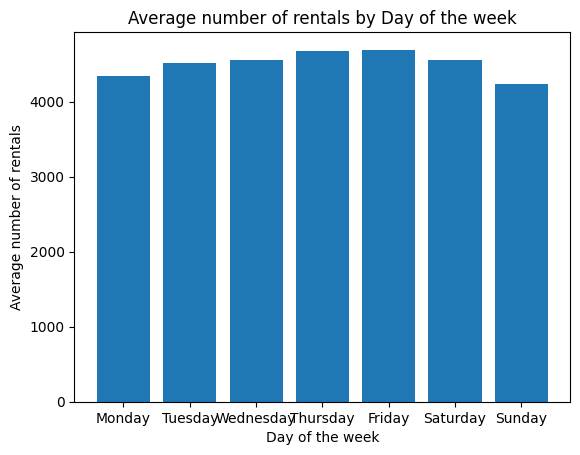

In [27]:
#Pertanyaan 2
avgRentalByDay = day_df.groupby(day_df['dteday'].dt.day_of_week)['cnt'].mean()
plt.bar(avgRentalByDay.index.map(numToDay), avgRentalByDay.values)
plt.xlabel('Day of the week')
plt.ylabel('Average number of rentals')
plt.title('Average number of rentals by Day of the week')
plt.show()

Terlihat bahwa rental sepeda mendapatkan puncak rental pada hari jumat dan jumlah rental paling rendah terdapat pada hari minggu

## Conclusion

- Conclusion pertanyaan 1
Terdapat korelasi negatif antara situasi cuaca dengan jumlah rental sepeda sehingga terlihat bahwa rental sepeda terjadi paling banyak pada cuaca "Clear" dan paling sedikit saat "Light snow/rain"
- Conclusion pertanyaan 2
Rata-rata rental sepeda paling banyak terjadi pada hari jumat sedangkan jumlah rental rata-rata paling sedikit terjadi pada hari minggu